In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [2]:
import SimpleITK as sitk
import numpy as np

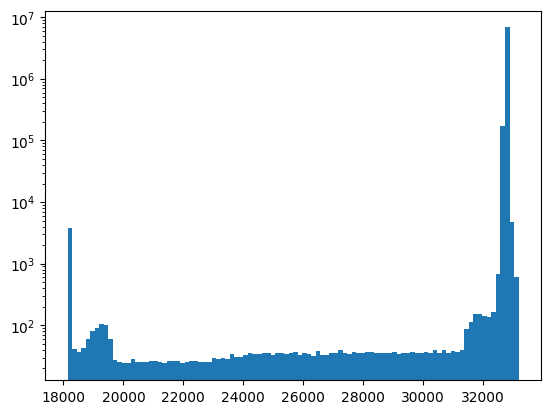

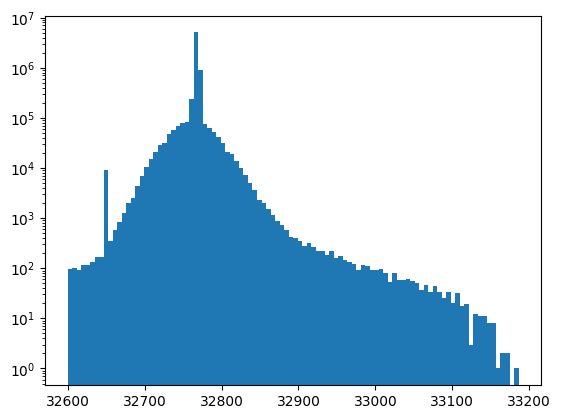

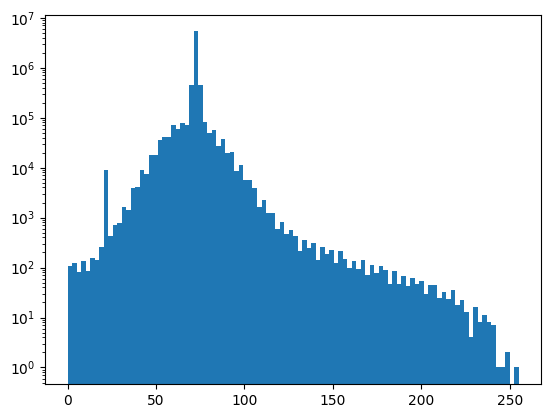

In [3]:
# read example image
image_path = repo_path / 'data/images/SET/Pat_2_SET_SMC_to_CMC_1min.tif'
# read image
im_sitk = sitk.ReadImage(str(image_path))
# get image array
im_array = sitk.GetArrayFromImage(im_sitk)
# im_array = im_array.astype(np.int32)
# im_array = (im_array - np.power(2,15)).astype(np.int16)

# show image histogram
import matplotlib.pyplot as plt
# in log scale
plt.hist(im_array.flatten(),bins=100,log=True)
plt.show()

# send to 32600 all pixels below that value
im_array[im_array<32600] = 32650
# show image histogram
plt.hist(im_array.flatten(),bins=100, log=True)
plt.show()

# map im_array to 256 pixels
im_array = (im_array - np.min(im_array)) / (np.max(im_array) - np.min(im_array))
im_array = (im_array * 255).astype(np.uint8)
# show image histogram
plt.hist(im_array.flatten(),bins=100, log=True)
plt.show()

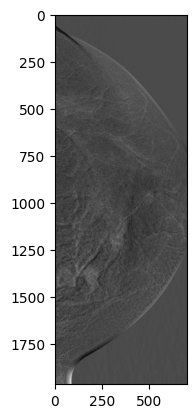

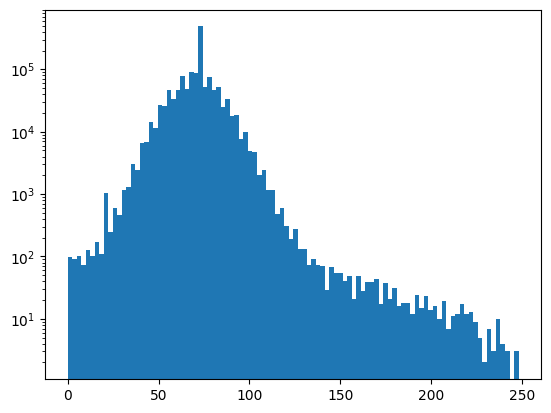

In [18]:
# crop image
im_array_cropped = im_array[500:-500,0:700]
# show image
plt.imshow(im_array_cropped, cmap='gray')
plt.show()
# show image histogram
plt.hist(im_array_cropped.flatten(),bins=100, log=True)
plt.show()

In [17]:
# turn into png image and save
im_png = sitk.GetImageFromArray(im_array_cropped)
png_path = repo_path / 'deep/data' / 'Pat_example.png'
sitk.WriteImage(im_png,str(png_path))

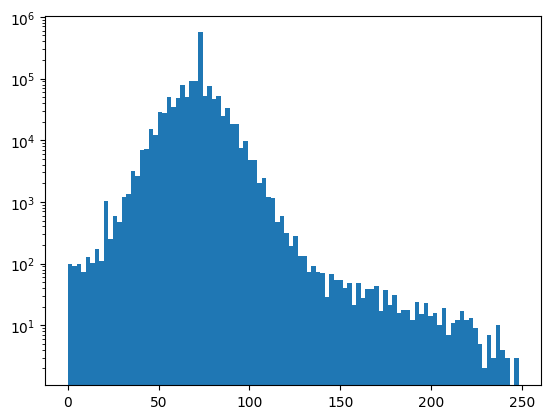

In [9]:
# read saved image and check histogram, as well as pixel values
im_png_read = sitk.ReadImage(str(png_path))
im_array_read = sitk.GetArrayFromImage(im_png_read)
# show image histogram
plt.hist(im_array_read.flatten(),bins=100, log=True)
plt.show()
